<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Mohammad Morsali

**Student ID**: 400101956



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Import necessary libraries here ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
## Write your code here ##
df = pd.read_csv('Q1/boston.csv')

The dataset under consideration pertains to the Boston Housing market, encompassing an array of insightful parameters from 506 unique residential properties situated in diverse zones. These properties are characterized by 13 distinct features alongside the crucial output variable `MDEV`, denoting the median value of owner-occupied homes.

1. **CRIM (Per Capita Crime Rate)**: This feature provides insights into the crime rate prevalent in various townships.
2. **ZN (Proportion of Residential Land)**: It delineates the portion of residential land zoned for plots exceeding 25,000 square feet, offering a glimpse into the zoning regulations.
3. **INDUS (Non-Retail Business Proportion)**: This metric divulges the proportion of non-retail business acres within each township, indicating the nature of economic activities.
4. **CHAS (Charles River Proximity)**: A binary variable indicating whether the property borders the Charles River, presenting a geographical context.
5. **NOX (Nitric Oxide Concentration)**: It quantifies the concentration of nitric oxide, an environmental pollutant, measured in parts per 10 million.
6. **RM (Average Number of Rooms)**: This feature provides insight into the average room count per dwelling, reflecting the property sizes.
7. **AGE (Proportion of Older Units)**: It delineates the proportion of owner-occupied units constructed prior to 1940, offering insights into the vintage of the housing stock.
8. **DIS (Distance to Employment Centers)**: Representing weighted distances to five prominent employment hubs in Boston, it offers a perspective on accessibility to job opportunities.
9. **RAD (Accessibility to Highways)**: This index gauges the accessibility to radial highways, indicating transportation infrastructure.
10. **TAX (Property Tax Rate)**: It denotes the full-value property-tax rate per $10,000, shedding light on the fiscal burden borne by property owners.
11. **PTRATIO (Pupil-Teacher Ratio)**: This metric elucidates the pupil-teacher ratio prevailing in different townships, reflecting educational resources.
12. **B (Ethnicity Metric)**: Calculated as 1000 times the square of (Bk - 0.63), where Bk represents the proportion of Black individuals in each township, offering insights into demographic composition.
13. **LSTAT (Socio-Economic Status)**: This parameter represents the percentage of the population belonging to the lower socio-economic strata, providing socio-economic context.

This comprehensive dataset facilitates nuanced analysis and modeling, offering valuable insights into the intricate dynamics of the Boston housing market and its underlying socio-economic landscape.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
## Write your code here ##


# Define the feature matrix by dropping the target variable 'MEDV' from the dataframe
features = df.drop('MEDV', axis=1) 

# Define the target variable
target = df['MEDV']

# Split the data into training and testing sets with a test size of 20%
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(features_train, target_train)

# Predict the target variable for the training data
target_train_predicted = linear_model.predict(features_train)

# Predict the target variable for the testing data
target_test_predicted = linear_model.predict(features_test)

# Print the R^2 score for the training data
print("Train R^2: ", r2_score(target_train, target_train_predicted))

# Print the Root Mean Squared Error (RMSE) for the training data
print("Train RMSE: ", np.sqrt(mean_squared_error(target_train, target_train_predicted)))

# Print the R^2 score for the testing data
print("Test R^2: ", r2_score(target_test, target_test_predicted))

# Print the Root Mean Squared Error (RMSE) for the testing data
print("Test RMSE: ", np.sqrt(mean_squared_error(target_test, target_test_predicted)))

# Print the coefficients of the linear regression model
print("Coefficients: ", linear_model.coef_)
# Perform 5-fold cross-validation and print the mean R^2 score
cv_scores = cross_val_score(linear_model, features, target, cv=5)
print("Cross-validation R^2: ", np.mean(cv_scores))

# Plot residuals
residuals = target_test - target_test_predicted
sns.residplot(x=target_test_predicted, y=residuals, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_model, features, target, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [ ]:
## Write your code here ##
alphas = 10**np.linspace(3, -3, 100) * 0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

In [ ]:
import seaborn as sns

def train_model(alpha, features_train, target_train):
    ridge = Ridge(alpha=alpha)
    ridge.fit(features_train, target_train)
    return ridge

def predict(ridge, features):
    return ridge.predict(features)

def calculate_errors(target, prediction):
    mse = mean_squared_error(target, prediction)
    r2 = r2_score(target, prediction)
    return mse, r2

# Initialize lists to store errors, coefficients, and number of zero coefficients
train_errors = []
test_errors = []
coefficients = []
zero_features = []

# Loop over each alpha value
for alpha in alphas:
    # Train the Ridge regression model
    ridge = train_model(alpha, features_train, target_train)

    # Predict the target variable for the training and testing data
    y_train_pred = predict(ridge, features_train)
    y_test_pred = predict(ridge, features_test)

    # Calculate and store the MSE for the training and testing data
    train_errors.append(calculate_errors(target_train, y_train_pred)[0])
    test_errors.append(calculate_errors(target_test, y_test_pred)[0])

    # Store the coefficients and the number of zero coefficients
    coefficients.append(ridge.coef_)
    zero_features.append(np.sum(ridge.coef_ == 0))

# Convert the list of coefficients to a numpy array for easier manipulation
coefficients = np.array(coefficients)

# Set the style of the plots to be seaborn's style
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, figsize=(14, 21))

# Plot MSE vs Alpha for training and testing data
axs[0].plot(alphas, train_errors, label='Train', color='blue', linewidth=2)
axs[0].plot(alphas, test_errors, label='Test', color='red', linewidth=2)
axs[0].set_xlabel('Alpha (Regularization Strength)', fontsize=14)
axs[0].set_ylabel('Mean Squared Error (MSE)', fontsize=14)
axs[0].set_title('MSE vs Alpha for Training and Testing Sets', fontsize=16)
axs[0].set_xscale('log')
axs[0].legend(loc='upper right')

# Plot Coefficients vs Alpha
colors = plt.cm.viridis(np.linspace(0, 1, coefficients.shape[1]))
for i in range(coefficients.shape[1]):
    axs[1].plot(alphas, coefficients[:, i], label = 'Feature ' + str(i+1), color=colors[i], linewidth=2)
axs[1].set_xlabel('Alpha (Regularization Strength)', fontsize=14)
axs[1].set_ylabel('Model Coefficients', fontsize=14)
axs[1].set_title('Model Coefficients vs Alpha', fontsize=16)
axs[1].set_xscale('log')
axs[1].legend(loc='upper right')

# Plot Number of Zero Coefficients vs Alpha
axs[2].plot(alphas, zero_features, label='Not-Considered Features', color='green', linewidth=2)
axs[2].set_xlabel('Alpha (Regularization Strength)', fontsize=14)
axs[2].set_ylabel('Number of Features Ignored', fontsize=14)
axs[2].set_title('Number of Features Ignored vs Alpha', fontsize=16)
axs[2].set_xscale('log')
axs[2].legend(loc='upper right')

# Display the figure
plt.tight_layout()
plt.show()

# Find the optimum alpha value and print it
optimum_alpha = alphas[np.argmin(test_errors)]
print("Optimum alpha: ", optimum_alpha)

# Fit the Ridge regression model with the optimal alpha value
ridge_opt = train_model(optimum_alpha, features_train, target_train)

# Predict the target variable for the training and testing data with the optimal model
y_train_pred_opt = predict(ridge_opt, features_train)
y_test_pred_opt = predict(ridge_opt, features_test)

# Print the MSE and R^2 score for the training and testing data with the optimal model
train_mse, train_r2 = calculate_errors(target_train, y_train_pred_opt)
test_mse, test_r2 = calculate_errors(target_test, y_test_pred_opt)

print(f"Train MSE: {train_mse}\nTest MSE: {test_mse}\nTrain R^2: {train_r2}\nTest R^2: {test_r2}")

# Print the coefficients of the optimal model
print("Coefficients: ", ridge_opt.coef_)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

The decision between Ridge and Lasso regression hinges on the nuanced requirements of the particular scenario at hand. Lasso regression emerges as the preferred choice when the objective entails feature selection amidst a plethora of features. Its inherent ability to drive certain coefficients to absolute zero renders it invaluable in scenarios where parsimony and interpretability are paramount. On the other hand, Ridge regression assumes precedence when the aim revolves around coefficient shrinkage, steering them towards zero while retaining their magnitude, thereby averting overfitting without entirely eliminating any coefficients.

However, navigating the complexities of real-world data often demands a more nuanced approach. Enter Elastic Net regression, a versatile technique that amalgamates the virtues of both Ridge and Lasso regression. By blending L1 and L2 regularization, Elastic Net strikes an optimal balance, offering a comprehensive solution that accommodates feature selection while mitigating overfitting. This amalgamation of regularization techniques affords practitioners the flexibility to tailor the model's behavior to the idiosyncrasies of the dataset, thereby optimizing predictive performance and interpretability simultaneously. Thus, in scenarios where the requirements transcend the limitations of individual techniques, Elastic Net regression emerges as a potent tool, harmonizing the divergent objectives of feature selection and coefficient regularization.

In [ ]:
## Write your code here ##
def train_model(alpha, features_train, target_train):
    lasso = Lasso(alpha=alpha)
    lasso.fit(features_train, target_train)
    return lasso

def predict(lasso, features):
    return lasso.predict(features)

def calculate_errors(target, prediction):
    mse = mean_squared_error(target, prediction)
    r2 = r2_score(target, prediction)
    return mse, r2

# Initialize lists to store errors, coefficients, and number of zero coefficients
train_errors = []
test_errors = []
coefficients = []
zero_features = []

# Loop over each alpha value
for alpha in alphas:
    # Train the Lasso regression model
    lasso = train_model(alpha, features_train, target_train)

    # Predict the target variable for the training and testing data
    y_train_pred = predict(lasso, features_train)
    y_test_pred = predict(lasso, features_test)

    # Calculate and store the MSE for the training and testing data
    train_errors.append(calculate_errors(target_train, y_train_pred)[0])
    test_errors.append(calculate_errors(target_test, y_test_pred)[0])

    # Store the coefficients and the number of zero coefficients
    coefficients.append(lasso.coef_)
    zero_features.append(np.sum(lasso.coef_ == 0))

# Convert the list of coefficients to a numpy array for easier manipulation
coefficients = np.array(coefficients)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, figsize=(14, 21))

# Set a title for the figure
fig.suptitle('Lasso Regression Analysis', fontsize=20)

# Plot MSE vs Alpha for training and testing data
axs[0].plot(alphas, train_errors, label='Train', linestyle='-', color='blue')
axs[0].plot(alphas, test_errors, label='Test', linestyle='--', color='red')
axs[0].set_xlabel('Regularization Parameter (Alpha)', fontsize=16)
axs[0].set_ylabel('Mean Squared Error (MSE)', fontsize=16)
axs[0].set_title('MSE vs Alpha for Train and Test Sets', fontsize=18)
axs[0].set_xscale('log')
axs[0].legend(loc='upper right', fontsize=14)

# Plot Coefficients vs Alpha
colors = sns.color_palette("hsv", coefficients.shape[1])
for i in range(coefficients.shape[1]):
    axs[1].plot(alphas, coefficients[:, i], label = 'Feature ' + str(i+1), color=colors[i])
axs[1].set_xlabel('Regularization Parameter (Alpha)', fontsize=16)
axs[1].set_ylabel('Lasso Coefficients', fontsize=16)
axs[1].set_title('Coefficients vs Alpha', fontsize=18)
axs[1].set_xscale('log')
axs[1].legend(loc='upper right', fontsize=14)

# Plot Number of Zero Coefficients vs Alpha
axs[2].plot(alphas, zero_features, label='Not-Considered Features', linestyle='-', color='green')
axs[2].set_xlabel('Regularization Parameter (Alpha)', fontsize=16)
axs[2].set_ylabel('Number of Features with Zero Coefficients', fontsize=16)
axs[2].set_title('Number of Not-Considered Features vs Alpha', fontsize=18)
axs[2].set_xscale('log')
axs[2].legend(loc='upper right', fontsize=14)

# Display the figure
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Find the optimum alpha value and print it
optimum_alpha = alphas[np.argmin(test_errors)]
print("Optimum alpha: ", optimum_alpha)

# Fit the Lasso regression model with the optimal alpha value
lasso_opt = train_model(optimum_alpha, features_train, target_train)

# Predict the target variable for the training and testing data with the optimal model
y_train_pred_opt = predict(lasso_opt, features_train)
y_test_pred_opt = predict(lasso_opt, features_test)

# Print the MSE and R^2 score for the training and testing data with the optimal model
train_mse, train_r2 = calculate_errors(target_train, y_train_pred_opt)
test_mse, test_r2 = calculate_errors(target_test, y_test_pred_opt)

print(f"Train MSE: {train_mse}\nTest MSE: {test_mse}\nTrain R^2: {train_r2}\nTest R^2: {test_r2}")

# Print the coefficients of the optimal model
print("Coefficients: ", lasso_opt.coef_)

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

In [ ]:
# Define the range of training data ratios
training_ratios = np.linspace(0.01, 0.99, 20)

# Define a range of alpha values to try
alpha_values = np.logspace(-4, 4, 50)

# Define models
models = {
    'Linear': LinearRegression(),
    'Ridge': RidgeCV(alphas=alpha_values),
    'Lasso': LassoCV(alphas=alpha_values)
}

# Initialize dictionaries to store R^2 scores and alpha values for each model
model_r2_scores = {model: [] for model in models.keys()}
model_alphas = {model: [] for model in models.keys() if model != 'Linear'}

# For each training data ratio
for ratio in training_ratios:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=ratio, random_state=42)
    
    # Fit the models and calculate and store the R^2 scores for each model
    for model_name, model in models.items():
        fitted_model = model.fit(X_train, y_train)
        model_r2_scores[model_name].append(r2_score(y_test, fitted_model.predict(X_test)))
        if model_name != 'Linear':
            model_alphas[model_name].append(fitted_model.alpha_)

# Set the style of the plots to be seaborn's style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(16, 18))

# Plot R^2 scores for each model
palette = sns.color_palette("hls", len(models))
for i, (model, scores) in enumerate(model_r2_scores.items()):
    sns.lineplot(x=training_ratios, y=scores, label=model, linewidth=2.5, color=palette[i], ax=axs[0])
axs[0].set_xlabel('Proportion of Data Used for Training', fontsize=16)
axs[0].set_ylabel('Coefficient of Determination ($R^2$ Score)', fontsize=16)
axs[0].set_title('Model Performance vs Training Data Proportion', fontsize=20)
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Plot alpha values for the Ridge and Lasso models
for i, (model, alpha_values) in enumerate(model_alphas.items()):
    sns.lineplot(x=training_ratios, y=alpha_values, label=model, linewidth=2.5, color=palette[i], ax=axs[1])
axs[1].set_xlabel('Proportion of Data Used for Training', fontsize=16)
axs[1].set_ylabel('Optimal Regularization Parameter (α)', fontsize=16)
axs[1].set_title('Regularization Parameter vs Training Data Proportion', fontsize=20)
axs[1].legend(loc='upper right')
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

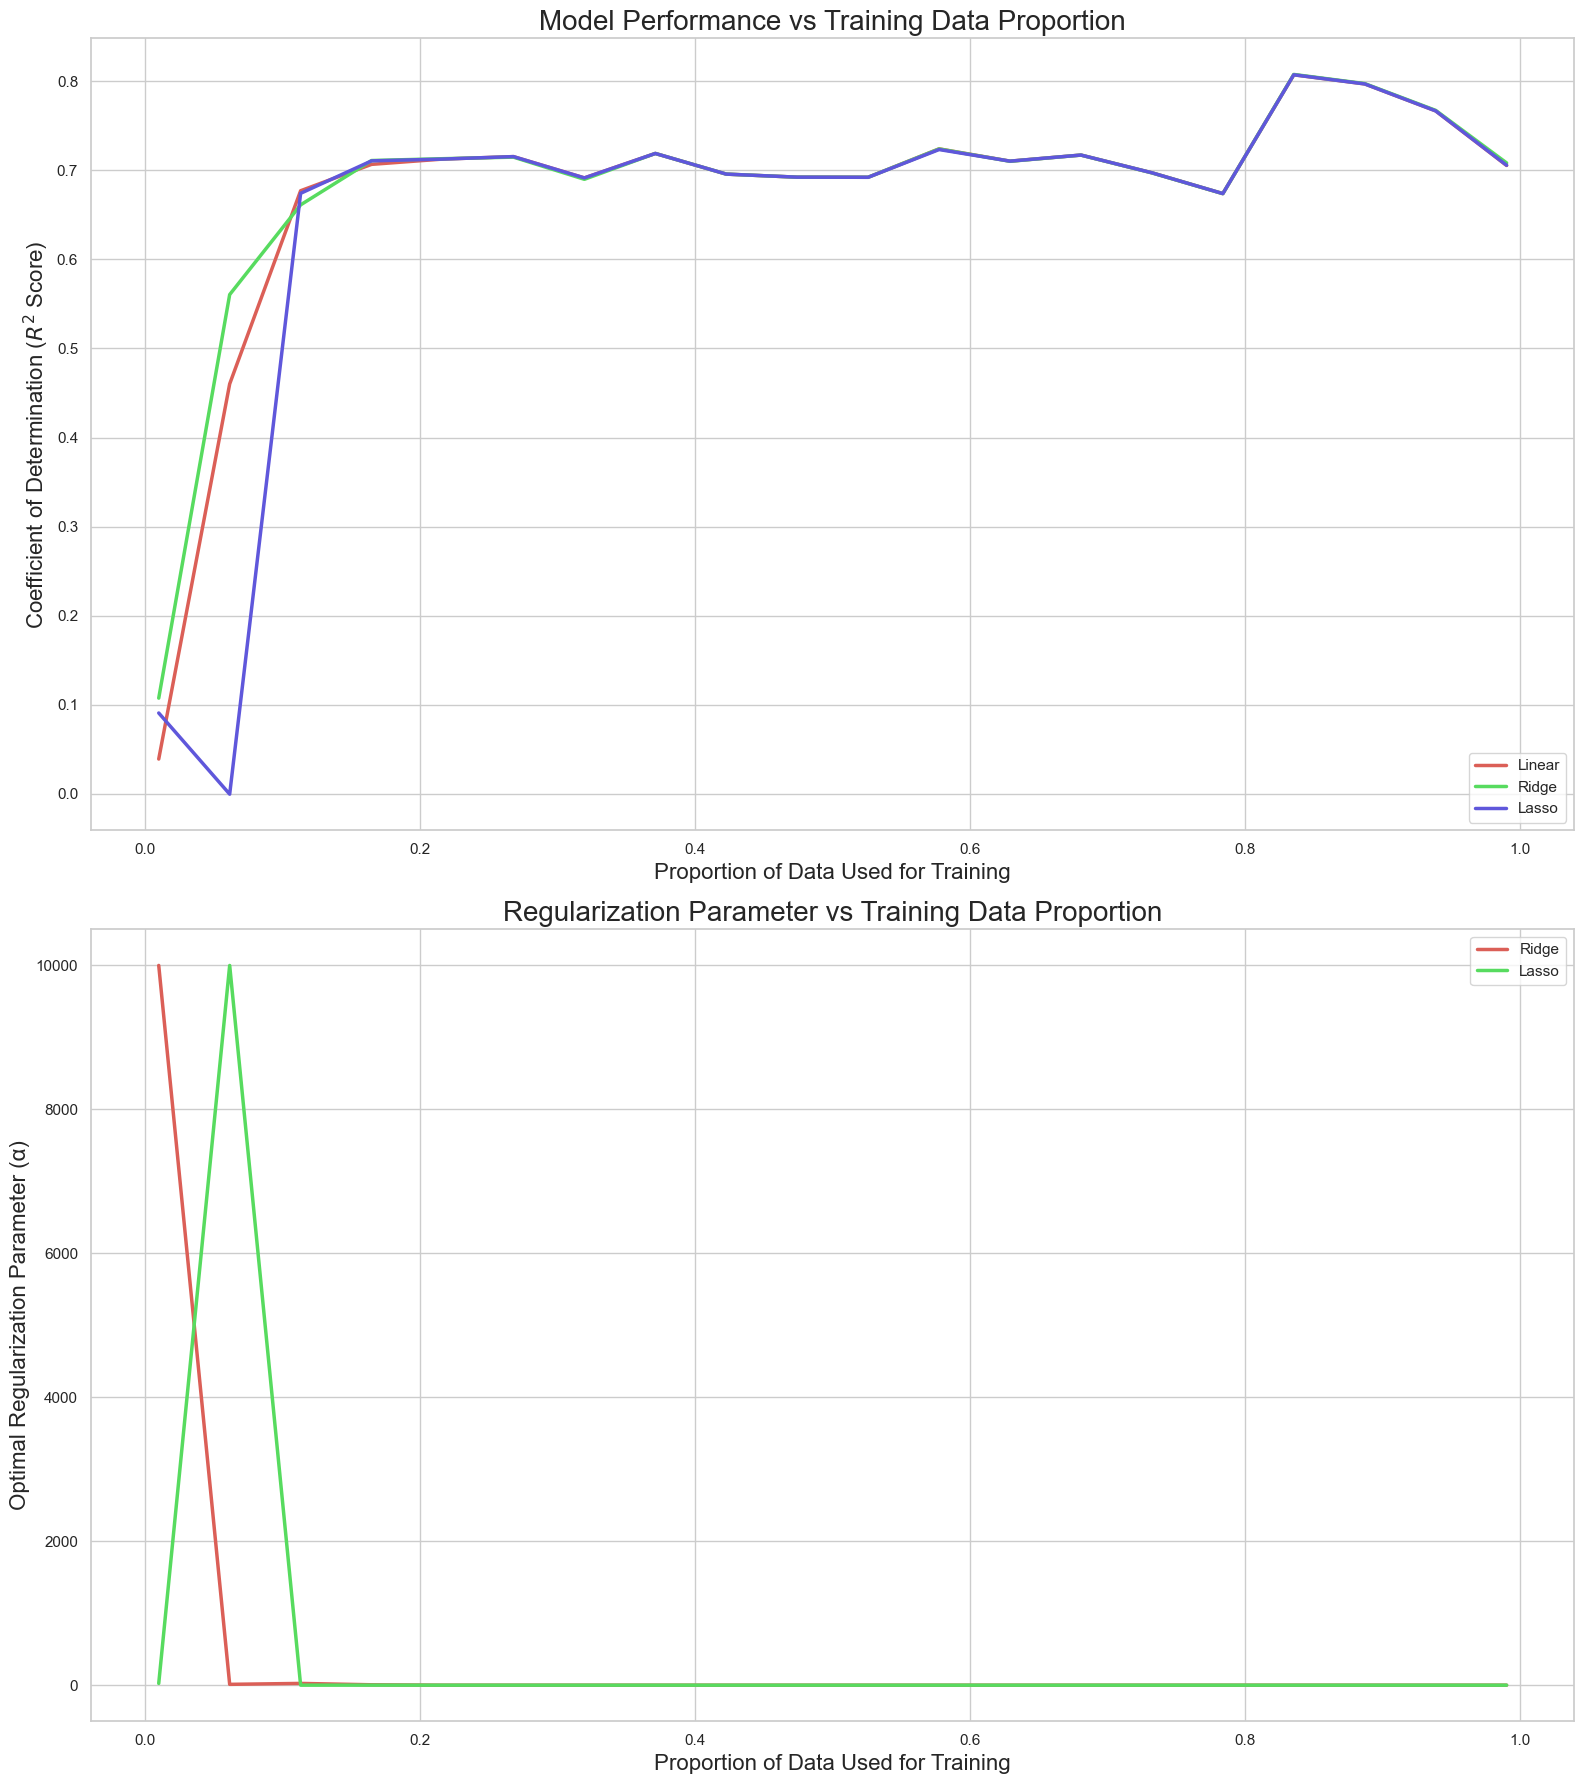

In [22]:
# Define the range of training data ratios
training_ratios = np.linspace(0.01, 0.99, 20)

# Define a range of alpha values to try
alpha_values = np.logspace(-4, 4, 50)

# Define models
models = {
    'Linear': LinearRegression(),
    'Ridge': RidgeCV(alphas=alpha_values),
    'Lasso': LassoCV(alphas=alpha_values)
}

# Initialize dictionaries to store R^2 scores and alpha values for each model
model_r2_scores = {model: [] for model in models.keys()}
model_alphas = {model: [] for model in models.keys() if model != 'Linear'}

# For each training data ratio
for ratio in training_ratios:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=ratio, random_state=42)
    
    # Fit the models and calculate and store the R^2 scores for each model
    for model_name, model in models.items():
        fitted_model = model.fit(X_train, y_train)
        model_r2_scores[model_name].append(r2_score(y_test, fitted_model.predict(X_test)))
        if model_name != 'Linear':
            model_alphas[model_name].append(fitted_model.alpha_)

# Set the style of the plots to be seaborn's style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(16, 18))

# Plot R^2 scores for each model
palette = sns.color_palette("hls", len(models))
for i, (model, scores) in enumerate(model_r2_scores.items()):
    sns.lineplot(x=training_ratios, y=scores, label=model, linewidth=2.5, color=palette[i], ax=axs[0])
axs[0].set_xlabel('Proportion of Data Used for Training', fontsize=16)
axs[0].set_ylabel('Coefficient of Determination ($R^2$ Score)', fontsize=16)
axs[0].set_title('Model Performance vs Training Data Proportion', fontsize=20)
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Plot alpha values for the Ridge and Lasso models
for i, (model, alpha_values) in enumerate(model_alphas.items()):
    sns.lineplot(x=training_ratios, y=alpha_values, label=model, linewidth=2.5, color=palette[i], ax=axs[1])
axs[1].set_xlabel('Proportion of Data Used for Training', fontsize=16)
axs[1].set_ylabel('Optimal Regularization Parameter (α)', fontsize=16)
axs[1].set_title('Regularization Parameter vs Training Data Proportion', fontsize=20)
axs[1].legend(loc='upper right')
axs[1].grid(True)

plt.tight_layout()
plt.show()